In [1]:
def crit_temp(data_dir):
    '''Gives the transition/critical temperature from the measured specific
    heat in terms of k_B*T/J.
    
    Parameters
    ----------
    data_dir : datafile ~.npz
        contains the 'temperature' 'magnetic_field' 'c_v' 'chi' arrays
    
    Returns
    -------
    T_c: float
        the critical temperature    
    '''
    
    data = np.load(data_dir)
    T = data['temperature'].reshape(np.shape(data['temperature'])[0])
    c_v = data['c_v'][:,0]
    T_c = T[c_v==max(c_v)]
    #T_c = 1/(1/2*np.arcsinh(1))
    print(T_c)
    return T_c

In [2]:
def load_data(data_dir, quantity):
    '''
    '''
    
    data = np.load(data_dir)
    xdata = data['temperature'].reshape(np.shape(data['temperature'])[0])
    ydata = data[quantity][:,0]
    y_err = data[quantity][:,1]
    
    return xdata, ydata, y_err

In [3]:
def plot_function(data_dir, quantity, LOG):
    '''Gives plot of the function in loglog or normal scale. X-axis is
    translated with critical temperature T_c when the loglog plot is selected.
    
    Parameters
    ----------
    data_dir : datafile ~.npz
        contains the 'temperature' 'magnetic_field' 'c_v' 'chi' arrays
    quantity : Str
        string which specifies which physical quantity must be fitted
    LOG : boolean
        Turns loglog plot on or off
        
    Returns
    -------
    plot of data provided
    '''
    
    xdata, ydata, y_err = load_data(data_dir, quantity)
    
    T_c = crit_temp(data_dir)
    
    #if quantity == 'magnetisation':
    
    if LOG:
        plt.loglog(xdata[(xdata-T_c)>0]-T_c, ydata[(xdata-T_c)>0], 'bx')
        plt.loglog(abs(xdata[(xdata-T_c)<0]-T_c), ydata[(xdata-T_c)<0], 'rx')
        plt.grid()
    else:
        plt.plot(xdata,ydata, 'b--')
    
    plt.show()
        

[ 2.3]


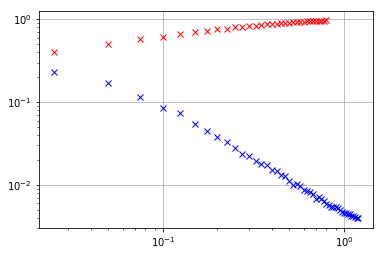

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#matplotlib notebook

plot_function('./exported_data/saved_data_L40_SW_2000.npz', 'magnetisation', True)

In [5]:
def fit_function(data_dir, quantity, fit_range, plotYN):
    '''Gives the best fit to quantity with non-linear least squares
    
    Parameters
    ----------
    data_dir : datafile ~.npz
        contains the 'temperature' 'magnetic_field' 'c_v' 'chi' arrays
    quantity : Str
        string which specifies which physical quantity must be fitted
    fit_range: sequence
        [LB, UB], the lower and upper boundary of the interval to be
        fitted w.r.t T_c
    plotYN : boolean
        turns plotting of fit and original function on or off
              
    Returns
    -------
    popt: array
        Optimal values for parameters so sum of the squared residuals is minimized
    fit_err: sequence
        Standard deviation of the optimal values for the parameters
    '''
    
    # Initialisation of plot design and parameters
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=16)
    plt.xlabel('$\mathrm{k_B T/J}$')
    
       
    # Loading data and general functions (and generate transition temperature (T_c))
    from scipy.optimize import curve_fit
    
    data = np.load(data_dir)
    xdata = data['temperature'].reshape(np.shape(data['temperature'])[0])
    ydata = data[quantity][:,0]
    y_err = data[quantity][:,1]
    
    T_c = crit_temp(data_dir)
    
    # Fitting
    ## Selecting data for fit
    indices = np.where(((xdata-T_c)>fit_range[0]) & ((xdata-T_c)<fit_range[1]))
    print(fit_range[0])
    xdata_fit = xdata[indices] - T_c
    ydata_fit = ydata[indices]
    y_err_fit = y_err[indices]
    print(xdata_fit)
    
    if quantity == 'magnetisation':
        from Model_equations_fitting import f_magnetisation as f
        plt.ylabel('m')
    if quantity == 'c_v':
        from Model_equations_fitting import f_cv as f
        plt.ylabel('$\mathrm{c_v}$')
    if quantity == 'chi':
        from Model_equations_fitting import f_chi as f
        plt.ylabel('$\mathrm{\chi}$')
    
    
    popt, pcov = curve_fit(f, abs(xdata_fit), ydata_fit, sigma=y_err_fit)
    fit_err = np.sqrt(np.diag(pcov))

    if plotYN:
        # Generate fit plot data
        xdata_fit_plot = np.linspace(xdata_fit[0], xdata_fit[-1], 1000)
        #print(xdata_fit_plot)
        ydata_fit_plot = f(abs(xdata_fit_plot), *popt)
        plt.loglog(abs(xdata_fit_plot),ydata_fit_plot, 'k--')
        plt.loglog(xdata[(xdata-T_c)>0]-T_c, ydata[(xdata-T_c)>0], 'bx')
        plt.loglog(abs(xdata[(xdata-T_c)<0]-T_c), ydata[(xdata-T_c)<0], 'rx')
        #plt.loglog(abs(xdata_fit_plot),ydata_fit_plot, 'g--')
        plt.grid()
        plt.show()
   
    return popt, fit_err

<IPython.core.display.Javascript object>


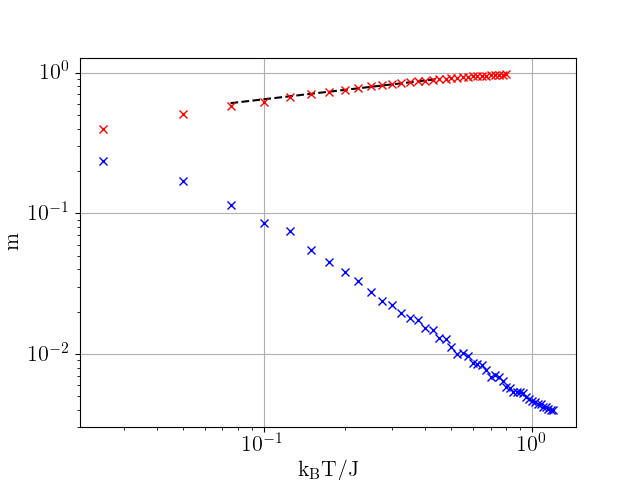

[ 2.3]
-0.46
[-0.075 -0.1   -0.125 -0.15  -0.175 -0.2   -0.225 -0.25  -0.275 -0.3   -0.325
 -0.35  -0.375 -0.4   -0.425 -0.45 ]


In [6]:
%matplotlib notebook
boundaries = np.array([-0.46, -0.074])
popt, fit_err = fit_function('./exported_data/saved_data_L40_SW_2000.npz', 'magnetisation', boundaries, True)

In [7]:
print(popt)
print(fit_err)

[ 1.07865765  0.22181761]
[ 0.00641863  0.00542036]


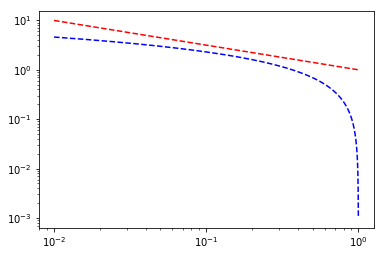

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_test = np.linspace(0.01, 1, 1000)
y_test1 = x_test**-0.5
y_test2 = abs(np.log(x_test))

plt.loglog(x_test,y_test1,'r--')
plt.loglog(x_test,y_test2,'b--')
plt.show()